<a href="https://colab.research.google.com/github/diogocoding/titanic-analise-exploratoria-python-EDA/blob/main/atvd_04_tratamento_e_an%C3%A1lise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import matplotlib.pyplot as plt #.pyplot √© uma interface que torna o matplotlib +f√°cil e pr√°tico
import seaborn as sns

In [72]:
sns.set_style('whitegrid') #define o estilo dos gr√°ficos
plt.rcParams['figure.figsize'] = (10, 6) #define o tamanho padr√£o para as figuras dos gr√°ficos

In [73]:
df = pd.read_csv('train.csv') #l√™ o arquivo e armazena o resultado em na vari√°vel df
print("5 primeiras linhas do conjunto de dados")
print(df.head())

5 primeiras linhas do conjunto de dados
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [74]:
print("\nInforma√ß√µes gerais sobre o conjunto de dados")
df.info()


Informa√ß√µes gerais sobre o conjunto de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
#tratando dados da coluna "Age"
df_tratado = df.copy() #boa pr√°tica para evitar alterar o DataFrame original diretamente
mediana_idade = df_tratado['Age'].median() #pegar as medianas da coluna Age
df_tratado['Age'].fillna(mediana_idade, inplace=True) #preenche tds valores ausentes (NaN) com o valor atribuido a mediana_idade
print(f"A mediana da idade √©: {mediana_idade:.2f} anos. Usamos esse valor para preencher os dados ausentes.")
#:.2f -> especifica que o n√∫mero deve ser exibido com 2 d√≠gitos ap√≥s o ponto decimal e o f indica (fixed-point)
#a nota√ß√£o decimal padr√£o e garante que ele seja arredondado corretamente

A mediana da idade √©: 28.00 anos. Usamos esse valor para preencher os dados ausentes.


/tmp/ipython-input-841110557.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Age'].fillna(mediana_idade, inplace=True) #preenche tds valores ausentes (NaN) com o valor atribuido a mediana_idade


In [76]:
#tratando dados da coluna "Embarked"
moda_embarque = df_tratado['Embarked'].mode()[0]
#.mode -> nos retorna o valor +frequente
#[0] nos d√° o primeiro valor da lista da moda, em case de empate - que
#ocorre quando h√° mais de um valor com a mesma frqu√™ncia
df_tratado['Embarked'].fillna(moda_embarque, inplace=True)
print(f"O porto de embarque mais comum √©: '{moda_embarque}'. Usamos este valor para preencher os dados ausentes.")

O porto de embarque mais comum √©: 'S'. Usamos este valor para preencher os dados ausentes.


/tmp/ipython-input-2723374665.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tratado['Embarked'].fillna(moda_embarque, inplace=True)


In [77]:
#Removendo a coluna "Cabin"
df_tratado.drop('Cabin', axis=1, inplace=True) #remove a coluna 'Cabin' e faz essa alter√ß√£o diretamente no DataFrame, sem fazer c√≥pia
print(f"A coluna 'Cabin' foi removida devido ao alto n√∫mero de valores ausentes (+de 77% de valores ausentes)")

A coluna 'Cabin' foi removida devido ao alto n√∫mero de valores ausentes (+de 77% de valores ausentes)


In [78]:
#verificando os valores ausentes
print("\nInforma√ß√µes do DataFrame ap√≥s o tratamento:")
df_tratado.info()


Informa√ß√µes do DataFrame ap√≥s o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [79]:
#agora com todas as 11 colunas possuindo 891 valores n√£o nulos (dados limpos de dados ausentes),
#vamos preparar os dados para an√°lise
#algumas colunas possuem dados categ√≥ricos - ex: sex('male', 'female') e Embarked('S', 'C', 'Q') -
#precisamos converter em dados num√©ricos
#utilizaremos a estrat√©gia One-Hot Encoding - pois resolve o problema da falsa ordena√ß√£o, transformando cada categoria em uma nova coluna
#se us√°ssemos o LabelEncoder gerar√≠amos uma rela√ß√£o de ordem - que n√£o existe na realidade
#o pandas tem a fun√ß√£o pd.get_dumies(), que faz exatamente isso prara n√≥s

In [80]:
#iremos primeiro exibir os valores √∫nicos das colunas categ√≥ricas
print("Valores √∫nicos em 'Sex' antes:", df_tratado['Sex'].unique())
print("Valores √∫nicos em 'Embarked'", df_tratado['Embarked'].unique())

Valores √∫nicos em 'Sex' antes: ['male' 'female']
Valores √∫nicos em 'Embarked' ['S' 'C' 'Q']


In [81]:
#aplicando o One-hot Encoding com pd.get_dummies()
df_categorico = pd.get_dummies(df_tratado, columns=['Sex', 'Embarked'], drop_first=True)

In [82]:
#vamos remover as colunas 'Name', 'Ticket', 'PassengerId', pois h√° muita cardinalidade
df_final = df_categorico.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
#exibindo as primeiras linhas do DataFrame tratado (dados categ√≥ricos convertidos e NaN preenchidos adequadamente)
print("\nAs 05 primeiras linhas do DataFrame tratado:")
print(df_final.head())


As 05 primeiras linhas do DataFrame tratado:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [83]:
#Iniciaremos agora a padroniza√ß√£o dos dados
#Tendo em vista que Age varia de 0 a 80, enquanto que Fare varia de 0 a 500
#iremos usar a estrat√©gia "StandardScaler" da biblioteca Scikit-learn
#assim a m√©dia ser√° igual a 0 e desvio padr√£o igual a 1
#a coluna Survived √© a vari√°vel que queremos entender e prever. Nesse sentido, n√£o iremos padroniz√°-la

In [84]:
#importando o StandardScaler
from sklearn.preprocessing import StandardScaler

In [85]:
#precisamos separar a vari√°vel alvo (y) das vari√°veis de caracte√≠sticas(x)
# x - ter√° todas as colunas que descrevem o passageiro
# y - ter√° apenas a informa√ß√£o de sobreviv√™ncias (que √© o que queremos analisar)
x = df_final.drop('Survived', axis=1)
y = df_final['Survived']

In [86]:
#At√© o momento, a vari√°vel x √© um DataFrame do pandas, que √© como uma planilha e possui r√≥tulos
#mas quando executamos a padroniza√ß√£o do StandardScaler, ele realiza os c√°lculos (subtrai a m√©dia e divide pelo desvio padr√£o)
#e nos devolve um Array do Numpy, qua n√£o possui r√≥tulos/nomes nas colunas
#a solu√ß√£o ser√° guardar os nomes antes de perd√™-los
colunas_x = x.columns

In [87]:
#criando uma inst√¢ncia do StandardScaler
#.fit_transform() -> calcula a m√©dia e o desvio padr√£o de cada coluna em x e aplica a transforma√ß√£o para padroniz√°-las
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [88]:
#criando um novo DataFrame com os dados padronizados
df_padronizado = pd.DataFrame(x_scaled, columns=colunas_x)

In [89]:
#exibindo as estat√≠sticas para confirmar a padroniza√ß√£o (m√©dia deve estar bem pr√≥ximo de 0 e o desvio padr√£o bem pr√≥ximo de 1)
print("\nEstat√≠sticas do DataFrame padronizado (arredondado para 2 casas decimais):")
print(df_padronizado.describe().round(2))


Estat√≠sticas do DataFrame padronizado (arredondado para 2 casas decimais):
       Pclass     Age   SibSp   Parch    Fare  Sex_male  Embarked_Q  \
count  891.00  891.00  891.00  891.00  891.00    891.00      891.00   
mean    -0.00    0.00    0.00    0.00    0.00     -0.00        0.00   
std      1.00    1.00    1.00    1.00    1.00      1.00        1.00   
min     -1.57   -2.22   -0.47   -0.47   -0.65     -1.36       -0.31   
25%     -0.37   -0.57   -0.47   -0.47   -0.49     -1.36       -0.31   
50%      0.83   -0.10   -0.47   -0.47   -0.36      0.74       -0.31   
75%      0.83    0.43    0.43   -0.47   -0.02      0.74       -0.31   
max      0.83    3.89    6.78    6.97    9.67      0.74        3.25   

       Embarked_S  
count      891.00  
mean        -0.00  
std          1.00  
min         -1.62  
25%         -1.62  
50%          0.62  
75%          0.62  
max          0.62  


In [90]:
#tratamento e prepara√ß√£o concluido
#agora realizaremos a an√°lise explorat√≥ria de dados (EDA)

In [91]:
#propor√ß√£o de passageiros que sobreviveram e que n√£o sobreviveram
#usaremos o df_tratado, antes da padroniza√ß√£o
#pois mant√©m as colunas originais 'Sex' e Embarked, que s√£o mais f√°ceis de interpretar
#0 -> n√£o sobreviveu e 1 -> sobreviveu
contagem_sobrevivencia = df_tratado['Survived'].value_counts()
print("Contagem de passageiros que sobreviveram e que n√£o sobreviveram:")
print(contagem_sobrevivencia)

Contagem de passageiros que sobreviveram e que n√£o sobreviveram:
Survived
0    549
1    342
Name: count, dtype: int64


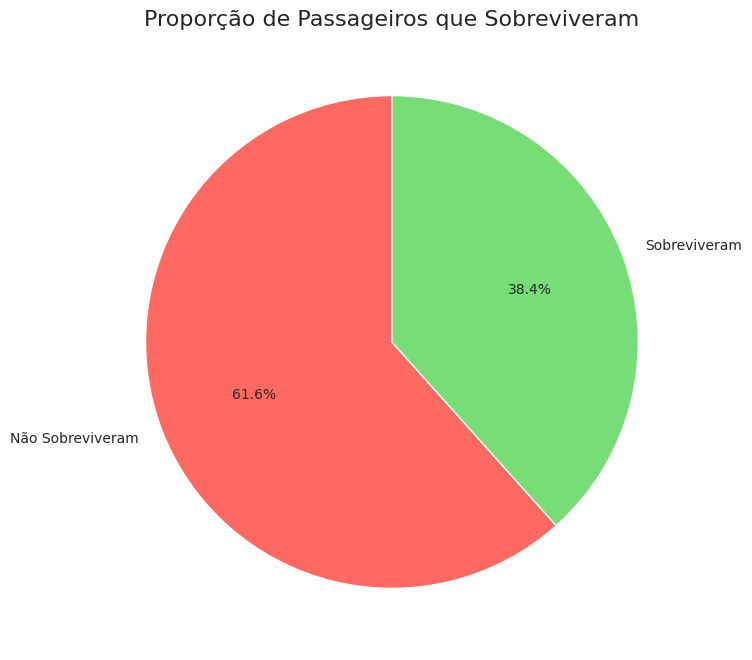

In [92]:
#gr√°fico de pizza para a contagem de sobreviv√™ncia
plt.figure(figsize=(8, 8))
plt.pie(contagem_sobrevivencia,
        labels=['N√£o Sobreviveram', 'Sobreviveram'],
        autopct='%1.1f%%', #formata os valores para percentual com uma casa decimal
        startangle=90, #gira o gr√°fico
        colors = ['#ff6961', '#77dd77']) # Cores para as fatias
plt.title('Propor√ß√£o de Passageiros que Sobreviveram', fontsize=16)
plt.ylabel('') #remove o r√≥tulo do eixo y que o matplotlib adiciona por padr√£o
plt.show()


/tmp/ipython-input-701096661.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Masculino', 'Feminino'])


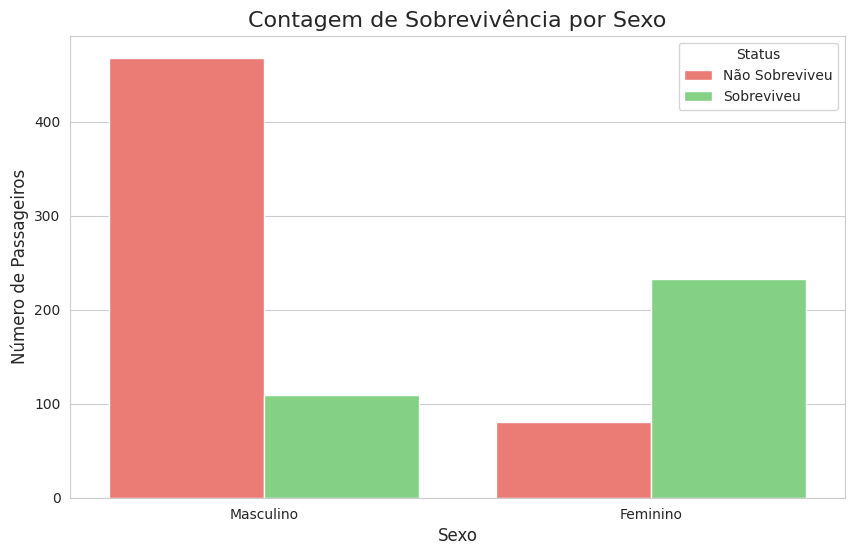


Taxa de Sobreviv√™ncia por Sexo:
Mulheres: 74.20%
Homens: 18.89%


In [100]:
#an√°lise de sobreviv√™ncia por sexo
plt.figure(figsize=(10, 6))
#sns.countplot() conta as ocorr√™ncias em cada categoria
# 'x="Sex"' define a vari√°vel no eixo x.
# 'hue="Survived"' divide as barras por outra vari√°vel (no caso, Sobreviveu ou N√£o).
# 'data=df_tratado' informa ao Seaborn qual DataFrame usar.
ax = sns.countplot(x='Sex', hue='Survived', data=df_tratado, palette={0: '#ff6961', 1: '#77dd77'})
#melhorando o gr√°fico
plt.title('Contagem de Sobreviv√™ncia por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('N√∫mero de Passageiros', fontsize=12)
# Alterando os r√≥tulos do eixo x e da legenda para maior clareza
ax.set_xticklabels(['Masculino', 'Feminino'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['N√£o Sobreviveu', 'Sobreviveu'], title='Status')
plt.show()
# Calculando os percentuais para uma an√°lise mais precisa
# O '.groupby('Sex')['Survived']' agrupa os dados por sexo e seleciona a coluna 'Survived'.
# '.mean()' em uma coluna de 0s e 1s calcula a propor√ß√£o de 1s (ou seja, a taxa de sobreviv√™ncia).
taxa_sobrevivencia_sexo = df_tratado.groupby('Sex')['Survived'].mean() * 100
print("\nTaxa de Sobreviv√™ncia por Sexo:")
print(f"Mulheres: {taxa_sobrevivencia_sexo['female']:.2f}%")
print(f"Homens: {taxa_sobrevivencia_sexo['male']:.2f}%")

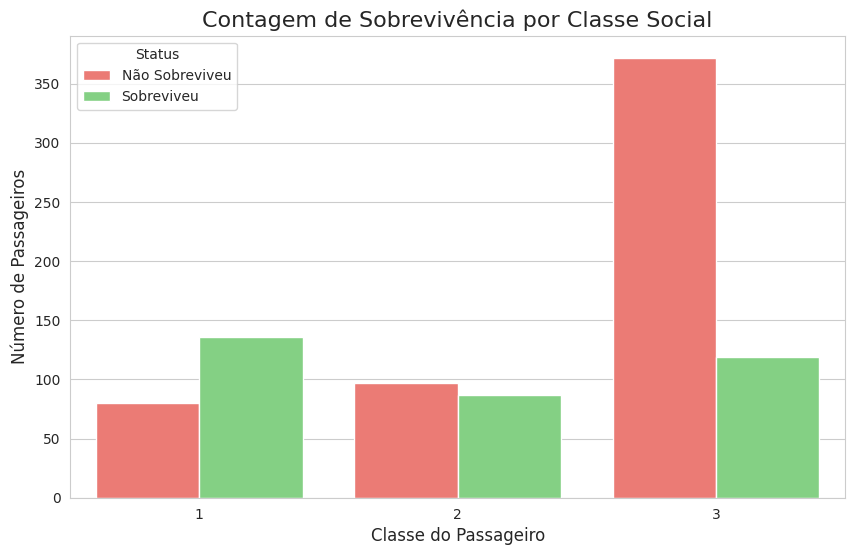


Taxa de Sobreviv√™ncia por Classe:
1¬™ Classe: 62.96%
2¬™ Classe: 47.28%
3¬™ Classe: 24.24%


In [101]:
#an√°lise de sobreviv√™ncia por classe
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df_tratado, palette={0: '#ff6961', 1: '#77dd77'})

# Melhorando o gr√°fico
plt.title('Contagem de Sobreviv√™ncia por Classe Social', fontsize=16)
plt.xlabel('Classe do Passageiro', fontsize=12)
plt.ylabel('N√∫mero de Passageiros', fontsize=12)

# Alterando os r√≥tulos da legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['N√£o Sobreviveu', 'Sobreviveu'], title='Status')

plt.show()

# Calculando os percentuais de sobreviv√™ncia para cada classe
taxa_sobrevivencia_classe = df_tratado.groupby('Pclass')['Survived'].mean() * 100
print("\nTaxa de Sobreviv√™ncia por Classe:")
print(f"1¬™ Classe: {taxa_sobrevivencia_classe[1]:.2f}%")
print(f"2¬™ Classe: {taxa_sobrevivencia_classe[2]:.2f}%")
print(f"3¬™ Classe: {taxa_sobrevivencia_classe[3]:.2f}%")

/tmp/ipython-input-3902715102.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
/tmp/ipython-input-3902715102.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_by_age, palette='viridis')


Gr√°fico 'survival_rate_by_age_group.png' foi salvo.
Gr√°fico 'age_distribution_survival.png' foi salvo.


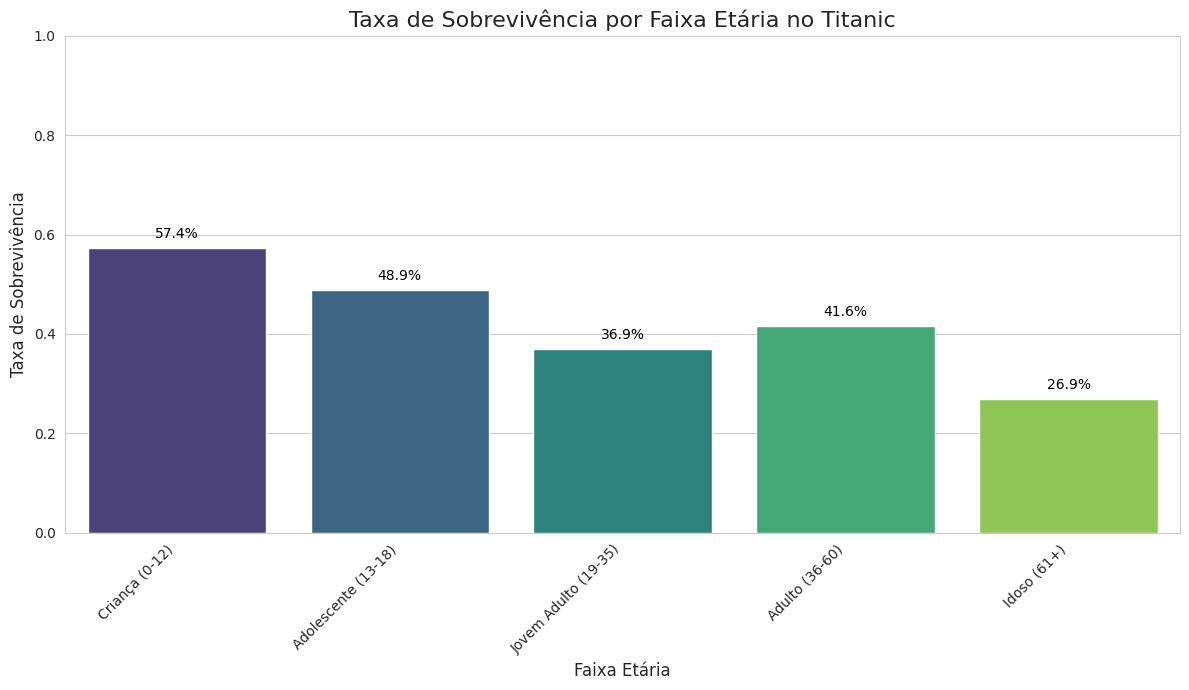

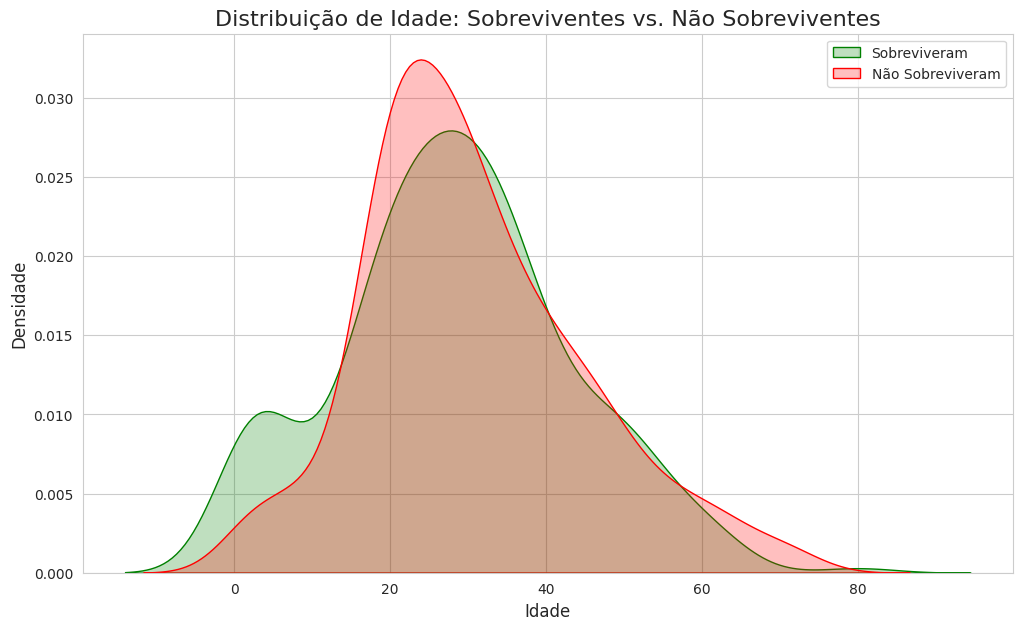

In [102]:
# --- An√°lise por Faixa Et√°ria ---
# 1. Criar faixas et√°rias (bins) para agrupar os passageiros.
bins = [0, 12, 18, 35, 60, 81]
labels = ['Crian√ßa (0-12)', 'Adolescente (13-18)', 'Jovem Adulto (19-35)', 'Adulto (36-60)', 'Idoso (61+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 2. Calcular a taxa de sobreviv√™ncia para cada faixa et√°ria.
# Usamos groupby() para agrupar por 'AgeGroup' e .mean() em 'Survived' para obter a taxa.
survival_rate_by_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# --- Visualiza√ß√µes ---

# Gr√°fico 1: Taxa de Sobreviv√™ncia por Faixa Et√°ria
plt.figure(figsize=(12, 7))
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_by_age, palette='viridis')
plt.title('Taxa de Sobreviv√™ncia por Faixa Et√°ria no Titanic', fontsize=16)
plt.xlabel('Faixa Et√°ria', fontsize=12)
plt.ylabel('Taxa de Sobreviv√™ncia', fontsize=12)
plt.ylim(0, 1.0) # Ajustar o limite do eixo Y para ir de 0 a 1 (0% a 100%)
# Adicionar os valores percentuais no topo das barras
for index, row in survival_rate_by_age.iterrows():
    plt.text(row.name, row.Survived + 0.02, f'{row.Survived:.1%}', color='black', ha="center", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('survival_rate_by_age_group.png')
print("Gr√°fico 'survival_rate_by_age_group.png' foi salvo.")


# Gr√°fico 2: Distribui√ß√£o de Idade para Sobreviventes vs. N√£o Sobreviventes
plt.figure(figsize=(12, 7))
# Usamos sns.kdeplot para uma visualiza√ß√£o suave da distribui√ß√£o
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Sobreviveram', color='green', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='N√£o Sobreviveram', color='red', fill=True)
plt.title('Distribui√ß√£o de Idade: Sobreviventes vs. N√£o Sobreviventes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.savefig('age_distribution_survival.png')
print("Gr√°fico 'age_distribution_survival.png' foi salvo.")

**Conclus√£o da An√°lise Explorat√≥ria de Dados**

üìä
O Que os Dados Revelam Sobre a Taxa de Sobreviv√™ncia?
A primeira grande revela√ß√£o √© que a sobreviv√™ncia no naufr√°gio do Titanic n√£o foi uma quest√£o de sorte üé≤. A taxa de sobreviv√™ncia geral foi baixa, com apenas 38.4% dos passageiros conseguindo se salvar. Por tr√°s desses n√∫meros, existe uma hist√≥ria clara de uma hierarquia social r√≠gida, onde certos grupos tiveram uma vantagem imensa sobre outros. Sobreviver foi um privil√©gio determinado por um conjunto de regras sociais da √©poca, e os dados nos mostram exatamente quais foram essas regras.


Quais Fatores Mais Permitiram que as Pessoas Vivessem?

Nossa an√°lise revelou um "perfil" claro do passageiro com a maior probabilidade de sobreviver: uma mulher rica üíÉüí∞, de primeira classe, viajando em um grupo pequeno, preferencialmente com crian√ßas.

Os fatores podem ser classificados por ordem de import√¢ncia:

1. G√™nero (Ser Mulher) üö∫: O Fator Mais Decisivo

Evid√™ncia: Esta foi a vari√°vel com o impacto mais desproporcional. A an√°lise mostrou que as mulheres tiveram uma taxa de sobreviv√™ncia alt√≠ssima (cerca de 74%), enquanto os homens tiveram uma taxa baix√≠ssima (menos de 19%).

Motivo: Ader√™ncia estrita ao protocolo mar√≠timo de "mulheres e crian√ßas primeiro" durante a evacua√ß√£o.

2. Classe Socioecon√¥mica (Ser Rico) ü•á: O Privil√©gio da Primeira Classe

Evid√™ncia: A an√°lise de outliers de Tarifa (Fare) foi a mais reveladora. Passageiros que pagaram tarifas alt√≠ssimas tiveram uma taxa de sobreviv√™ncia de 72.4%, quase o dobro da m√©dia.

Motivo: Passageiros da Primeira Classe tinham suas cabines nos decks superiores, mais pr√≥ximos dos botes salva-vidas üö¢.

3. Idade (Ser Crian√ßa) üë∂: A Prote√ß√£o da Inf√¢ncia

Evid√™ncia: A an√°lise por faixa et√°ria mostrou que crian√ßas de 0 a 12 anos tiveram a maior taxa de sobreviv√™ncia entre todos os grupos de idade (quase 58%).

Motivo: Este √© o segundo pilar do protocolo de evacua√ß√£o, refor√ßando a prioridade dada √†s crian√ßas.

Fator que Diminuiu as Chances de Viver üìâ
Tamanho da Fam√≠lia (Viajar em um Grupo Grande) üë®‚Äçüë©‚Äçüëß‚Äçüë¶:

Evid√™ncia: A an√°lise de outliers nas colunas SibSp e Parch mostrou que passageiros em fam√≠lias muito grandes tiveram a pior taxa de sobreviv√™ncia, com apenas 29.3% se salvando.

Motivo: A hip√≥tese √© a dificuldade log√≠stica para reunir um grande n√∫mero de familiares e encontrar lugares para todos durante o caos.

Veredito Final ‚öñÔ∏è
A an√°lise de dados do Titanic revela uma microssociedade onde a chance de viver ou morrer era determinada pelo seu lugar nela. Seu g√™nero, sua riqueza e sua idade foram os fatores que, muito mais do que a for√ßa ou a sorte, decidiram quem conseguiria um lugar em um bote salva-vidas.